<a href="https://colab.research.google.com/github/chandrusuresh/ReinforcementLearning/blob/master/Ch3-Finite%20MDP%20GridWorld/GridWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Grid World Example
import numpy as np
from scipy import linalg as scilinalg
import matplotlib.pyplot as plt
%matplotlib inline

## Grid World Example

**Copy from [chandrusuresh/ReinforcementLearning](https://github.com/chandrusuresh/ReinforcementLearning/blob/master/GridWorld.ipynb)**

This is an example for a value function iteration for the grid world with a $5 \times 5$ grid. From each cell, four actions are possible, each with a move of 1 cell in the north, south, east and west directions. The rewards for states and actions is as follows:
1. An action bringing the agent outside of the grid bounds results in a reward of -1
2. All actions from the cell $\left[ 0,1 \right]$ would bring the agent to the cell $\left[ 4,1 \right]$ with a reward of +10
3. All actions from the cell $\left[ 0,3 \right]$ would bring the agent to the cell $\left[ 2,3 \right]$ with a reward of +5
4. All other actions from any cell would yield a reward of 0.

The agent selects all the actions with the same probability. The discount factor for each move is $\gamma = 0.9$

The grid and its rewards are illustrated below.

![Grid World](https://raw.githubusercontent.com/chandrusuresh/ReinforcementLearning/master/files/GridWorld.PNG)

## Approach
The value function (policy) is given as:
$$ v_\pi (s) = \sum_a{\pi(a|s)} \sum_{a,s'}{p(s',r|a,s) \left(r + \gamma v_\pi (s')\right)}  $$

For the grid, we have deterministic transitions for each action, which implies that $p(s',r|a,s) = 1$ for all valid transitions.

The above equation for the grid becomes:

$$ v_{\pi} (i,j) = \sum_a{\frac{1}{4}} \sum_{k,l}{\left(r + \gamma v_\pi (k,l) {}\right)}  $$
where $(k,l)$ is a cell adjacent to $(i,j)$ in the north,west,east and south directions.

Aggregating and solving the linear equations for all the cells, we get an equation of the form:
$$ \mathbf{A} \mathbf{v_\pi} = \mathbf{r} $$
where $\mathbf{v_\pi}$ and $\mathbf{r}$ represents the arrays from aggregating the values and rewards at each cell. The value functions are then obtained as follows:
$$ \mathbf{v_\pi} = \mathbf{A}^{-1} \mathbf{r} $$


In [ ]:
m = 5
n = 5
gamma = 0.9
grid = [[0 for j in range(m*n)] for i in range(m*n)]
reward = [0 for i in range(m*n)]
steps = [[-1,0],[1,0],[0,-1],[0,1]]
def getAdjacencyMatrix(i,j,gamma):
    idx_0 = i*n+j
    if i == 0 and j == 1:
        reward[idx_0] += 10
    elif i == 0 and j == 3:
        reward[idx_0] += 5
    for s in steps:
        if i == 0 and j == 1:
            r = m-1
            c = j
        elif i == 0 and j == 3:
            r = i+2
            c = j
        else:
            r = min(m-1,max(0,i+s[0]))
            c = min(n-1,max(0,j+s[1]))
        if r == i and c == j:
            reward[idx_0] -= 1/(float(len(steps)))
        idx = r*n + c
        grid[idx_0][idx] += gamma/(float(len(steps)))
    
for i in range(m):
    for j in range(n):
        getAdjacencyMatrix(i,j,gamma)

In [ ]:
A_mat = np.eye(m*n) - np.matrix(grid)
A_mat_inv = np.linalg.inv(A_mat)
val_func = np.matmul(A_mat_inv,np.matrix(reward).T)
print("State Value Function: ")
print(np.reshape(np.round(val_func,1),(m,n)))

State Value Function: 
[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


## Expressions relating state and action value functions
Exercice 3.17: $$ q_\pi (s,a) = \sum_{r,s'}{p(s',r|a,s) \left(r + \gamma \sum_{a'}{\pi(a'|s') q_\pi (s',a')}\right)}  $$

Exercise 3.18: $$ v_\pi (s) = \sum_{a}{\pi(a|s) q_\pi (s,a)}  $$

Exercise 3.19: $$ q_\pi (s,a) = \sum_{r,s'}{p(s',r|a,s) \left(r + \gamma v_\pi (s')\right)}  $$



## Action value function for Grid World Example
For the above example, the action value function would be computed based on the expression above.

In [ ]:
action_val_func = np.zeros((np.size(val_func,0),len(steps)))
print("Action Value Function: ")
print("     w   e    n    s")
for i in range(m):
    for j in range(n):
        idx0 = i*n+j
        for si,s in enumerate(steps):
            if i == 0 and j == 1:
                r = m-1
                c = j
                reward = 10
            elif i == 0 and j == 3:
                r = i+2
                c = j
                reward = 5
            else:
                r = min(m-1,max(0,i+s[0]))
                c = min(n-1,max(0,j+s[1]))
                reward = 0
                if r == i and c == j:
                    reward = -1
            idx = r*n + c
            action_val_func[idx0][si] += reward + gamma*val_func[idx]
#         print(i,',',j,':',np.round(action_val_func[idx0],1))
print(np.round(action_val_func,1))

Action Value Function: 
     w   e    n    s
[[ 2.   1.4  2.   7.9]
 [ 8.8  8.8  8.8  8.8]
 [ 3.   2.   7.9  4.8]
 [ 5.3  5.3  5.3  5.3]
 [ 0.3  0.5  4.8  0.3]
 [ 3.   0.   0.4  2.7]
 [ 7.9  0.7  1.4  2. ]
 [ 4.   0.6  2.7  1.7]
 [ 4.8  0.3  2.   0.5]
 [ 1.3 -0.4  1.7 -0.5]
 [ 1.4 -0.9 -1.   0.7]
 [ 2.7 -0.4  0.   0.6]
 [ 2.  -0.3  0.7  0.3]
 [ 1.7 -0.5  0.6 -0.4]
 [ 0.5 -1.1  0.3 -1.4]
 [ 0.  -1.7 -1.9 -0.4]
 [ 0.7 -1.2 -0.9 -0.3]
 [ 0.6 -1.1 -0.4 -0.5]
 [ 0.3 -1.3 -0.3 -1.1]
 [-0.4 -1.8 -0.5 -2.1]
 [-0.9 -2.7 -2.7 -1.2]
 [-0.4 -2.2 -1.7 -1.1]
 [-0.3 -2.1 -1.2 -1.3]
 [-0.5 -2.3 -1.1 -1.8]
 [-1.1 -2.8 -1.3 -2.8]]


## Iterative Policy Evaluation
Iterative policy evaluation is an algorithm where a value function is derived for a policy iteratively. The value function is initialized in the first step. The value function is updated at each step (k+1) based on the value iteration of the next states from the previous iteration (k) as follows:
$$ v_{k+1}(s) = \sum_a{\pi(a|s)} \sum_{a,s'}{p(s',r|a,s) \left(r + \gamma v_k (s')\right)}  $$
In this section, the algorithm for iterative policy evaluation is shown for the grid world example for both the state & action value functions.

Iterative Policy Evaluation for State Terminated?: [ True]
MaxDelta:  [0.0899573]
Approximate State Value Function:
[[ 4.1  9.6  5.2  6.1  2.3]
 [ 2.3  3.8  3.1  2.7  1.4]
 [ 0.9  1.5  1.5  1.2  0.4]
 [-0.2  0.4  0.5  0.2 -0.4]
 [-1.  -0.5 -0.4 -0.6 -1.2]]
Iterative Policy Evaluation for Action Terminated?: True
MaxDelta:  0.09009514617422809
Approximate Action Value Function:
[[ 2.8  2.2  2.8  8.7]
 [ 9.6  9.6  9.6  9.6]
 [ 3.8  2.8  8.7  5.6]
 [ 6.1  6.1  6.1  6.1]
 [ 1.1  1.3  5.6  1.1]
 [ 3.8  0.9  1.2  3.5]
 [ 8.7  1.5  2.2  2.8]
 [ 4.8  1.4  3.5  2.5]
 [ 5.6  1.1  2.8  1.3]
 [ 2.1  0.4  2.5  0.3]
 [ 2.2 -0.1 -0.1  1.5]
 [ 3.5  0.4  0.9  1.4]
 [ 2.8  0.5  1.5  1.1]
 [ 2.5  0.3  1.4  0.4]
 [ 1.3 -0.3  1.1 -0.6]
 [ 0.9 -0.9 -1.1  0.4]
 [ 1.5 -0.4 -0.1  0.5]
 [ 1.4 -0.3  0.4  0.3]
 [ 1.1 -0.5  0.5 -0.3]
 [ 0.4 -1.   0.3 -1.3]
 [-0.1 -1.9 -1.9 -0.4]
 [ 0.4 -1.4 -0.9 -0.3]
 [ 0.5 -1.3 -0.4 -0.5]
 [ 0.3 -1.5 -0.3 -1. ]
 [-0.3 -2.  -0.5 -2. ]]


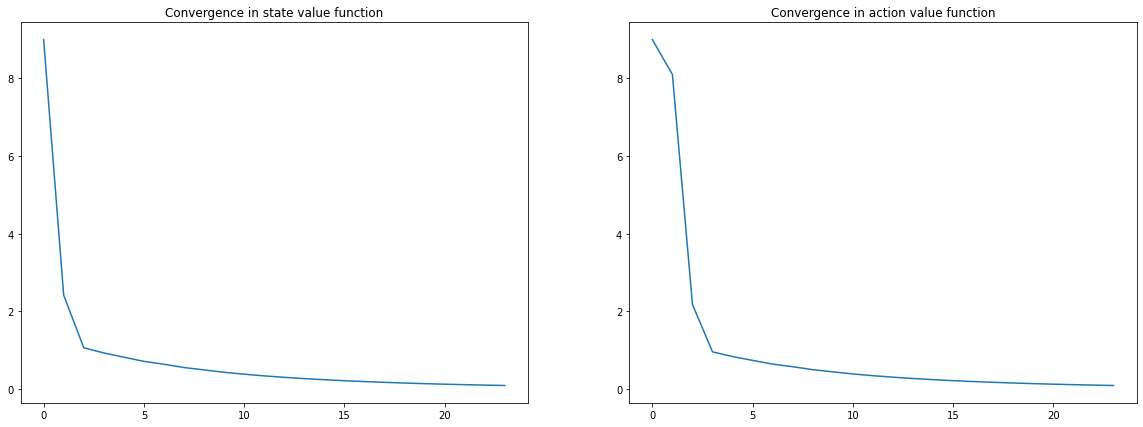

In [ ]:
init_state_v = 10*np.ones((m*n,1))
init_action_v = 10*np.ones((m*n,len(steps)))
tol = 0.1
pi = 1/float(len(steps))
def iterativePolicyEvaluation_state(maxIter = 50):
    v = init_state_v
    exitFlag = False
    iter = 0
    maxDelta = []
    while not exitFlag and iter < maxIter:
        iter = iter+1
        v_prev = np.copy(v)
        valFuncDelta = 0
        for i in range(m):
            for j in range(n):
                idx0 = i*n+j
                stateValFunc = 0
                for si,s in enumerate(steps):
                    if i == 0 and j == 1:
                        r = m-1
                        c = j
                        reward = 10
                    elif i == 0 and j == 3:
                        r = i+2
                        c = j
                        reward = 5
                    else:
                        r = min(m-1,max(0,i+s[0]))
                        c = min(n-1,max(0,j+s[1]))
                        reward = 0
                        if r == i and c == j:
                            reward = -1
                    idx = r*n + c
                    stateValFunc += reward + gamma*v_prev[idx]
                stateValFunc = pi*stateValFunc
                valFuncDelta = max(valFuncDelta,abs(v_prev[idx0]-stateValFunc))
                v[idx0] = stateValFunc
        maxDelta.append(valFuncDelta)
        exitFlag = valFuncDelta < tol
    return v,maxDelta,exitFlag

def iterativePolicyEvaluation_action(maxIter = 50):
    v = init_action_v
    exitFlag = False
    iter = 0
    maxDelta = []
    while not exitFlag and iter < maxIter:
        iter = iter+1
        v_prev = np.copy(v)
        valFuncDelta = 0
        for i in range(m):
            for j in range(n):
                idx0 = i*n+j
                for si,s in enumerate(steps):
                    if i == 0 and j == 1:
                        r = m-1
                        c = j
                        reward = 10
                    elif i == 0 and j == 3:
                        r = i+2
                        c = j
                        reward = 5
                    else:
                        r = min(m-1,max(0,i+s[0]))
                        c = min(n-1,max(0,j+s[1]))
                        reward = 0
                        if r == i and c == j:
                            reward = -1
                    idx = r*n + c
                    actionValFunc = reward + gamma*pi*sum(v_prev[idx,:])
                    valFuncDelta = max(valFuncDelta,abs(v_prev[idx0,si]-actionValFunc))
                    v[idx0,si] = actionValFunc
        maxDelta.append(valFuncDelta)
        exitFlag = valFuncDelta < tol
    return v,maxDelta,exitFlag
approx_state_val_func,maxDelta_state,exitFlag_state = iterativePolicyEvaluation_state()
approx_action_val_func,maxDelta_action,exitFlag_action = iterativePolicyEvaluation_action()
print('Iterative Policy Evaluation for State Terminated?:', exitFlag_state)
print('MaxDelta: ',maxDelta_state[-1])
print('Approximate State Value Function:')
print(np.reshape(np.round(approx_state_val_func,1),(m,n)))

print('Iterative Policy Evaluation for Action Terminated?:', exitFlag_action)
print('MaxDelta: ',maxDelta_action[-1])
print('Approximate Action Value Function:')
print(np.round(approx_action_val_func,1))

f,ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(range(len(maxDelta_state)),maxDelta_state)
ax[0].set_title('Convergence in state value function');
ax[1].plot(range(len(maxDelta_action)),maxDelta_action)
ax[1].set_title('Convergence in action value function');

## Iterative Policy Improvement

Policy improvement is an algorithm similar to policy evaluation and is applied as follows:
For each state, we select an action a, and thereafter follow the current policy. If the resulting value function offers an improvement over the value function with the current policy, then the policy for the current state is updated accordingly.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


Iterative Policy Improvement for State Terminated?: False
MaxDelta:  [5.05937227e-05]
Approximate Optimal State Value Function:
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]
Optimal policy
[[0.   0.   0.   1.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.5  0.   0.   0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.5  0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.5  0.   0.   0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.   0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.   0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.5  0.  ]
 [0.5  0.   0.5  0.  ]]


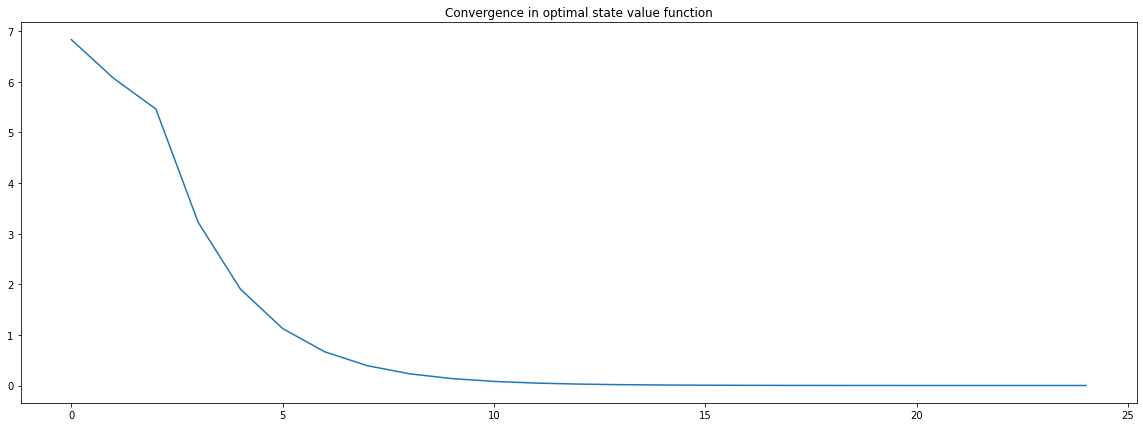

In [ ]:
init_state_v = np.copy(approx_state_val_func)
pi = 0.25*np.ones((init_state_v.shape[0],len(steps)))

def iterativePolicyImprovement_state(maxIter = 25):
    iter = 0
    v = init_state_v
    exitFlag = False
    iter = 0
    maxDelta = []
    while not exitFlag and iter < maxIter:
        iter = iter+1
        v_prev = np.copy(v)
        valFuncDelta = 0
        updateFound = False
        for i in range(m):
            for j in range(n):
                idx0 = i*n+j
                stateValFunc = 0
                new_pi = np.zeros((1,len(steps)))
                for si,s in enumerate(steps):
                    if i == 0 and j == 1:
                        r = m-1
                        c = j
                        reward = 10
                    elif i == 0 and j == 3:
                        r = i+2
                        c = j
                        reward = 5
                    else:
                        r = min(m-1,max(0,i+s[0]))
                        c = min(n-1,max(0,j+s[1]))
                        reward = 0
                        if r == i and c == j:
                            reward = -1
                    idx = r*n + c
                    stateValFunc = reward + gamma*v[idx]
                    if stateValFunc >= v[idx0]:
                        valFuncDelta = max(valFuncDelta,abs(v_prev[idx0]-stateValFunc))
#                         print(idx0,v[idx0],stateValFunc)
                        v[idx0] = stateValFunc
                        new_pi[0,si] = 1
                        updateFound = True
                    else:
                        continue
                        
                if updateFound:
#                     print(idx0,reward,v[idx0])
                    new_pi = new_pi/np.sum(new_pi)
                    pi[idx0,:] = new_pi
        maxDelta.append(valFuncDelta)
        exitFlag = not updateFound
    opt_pi = pi
    return v,opt_pi,maxDelta,exitFlag
opt_state_val_func,opt_pi,opt_maxDelta_state,opt_exitFlag_state = iterativePolicyImprovement_state()

print('Iterative Policy Improvement for State Terminated?:', opt_exitFlag_state)
print('MaxDelta: ',opt_maxDelta_state[-1])
print('Approximate Optimal State Value Function:')
print(np.reshape(np.round(opt_state_val_func,1),(m,n)))
print("Optimal policy")
print(pi)
f,ax = plt.subplots(1,1,figsize=(20,7))
ax.plot(range(len(opt_maxDelta_state)),opt_maxDelta_state)
ax.set_title('Convergence in optimal state value function');